In [1]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn import metrics

In [3]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


In [27]:
data = pd.read_csv("merged.csv")
#data

,Unnamed: 0.1,Unnamed: 0,TBL,msi_status,fraction_genome_altered,aneuploidy_score,TMB,TP53,KRAS,BRAF,...,TUBGCP5,ZNF37BP,SNRPN,ELMOD3,MFAP3,RWDD2B,TTC5,PDLIM2,BLM,DDX59
0,0,TCGA-3L-AA1B-01A,19,MSS,0.114119,6,118,WT,WT,SNV,...,1118.0,894.0,357.0,1180.0,605.0,662.0,560.0,561.0,478.0,703.0
1,1,TCGA-4N-A93T-01A,38,MSS,0.311631,12,81,SNV,SNV,WT,...,359.0,2045.0,88.0,1154.0,213.0,695.0,282.0,429.0,204.0,620.0
2,2,TCGA-5M-AAT4-01A,87,MSS,0.422921,13,159,SNV,SNV,WT,...,662.0,1135.0,956.0,1078.0,550.0,620.0,743.0,559.0,761.0,513.0
3,3,TCGA-5M-AAT5-01A,28,MSI-L,0.357734,12,72,SNV,WT,WT,...,544.0,691.0,783.0,501.0,537.0,286.0,298.0,286.0,1055.0,618.0
4,4,TCGA-5M-AAT6-01A,3,MSI-H,0.049432,2,1828,WT,SNV,WT,...,439.0,415.0,394.0,552.0,412.0,493.0,358.0,478.0,525.0,291.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,430,TCGA-QL-A97D-01A,104,MSS,0.309643,9,209,SNV,SNV,WT,...,434.0,1883.0,158.0,598.0,494.0,497.0,519.0,705.0,557.0,509.0
431,431,TCGA-RU-A8FL-01A,105,MSS,0.270808,10,115,SNV,WT,WT,...,390.0,650.0,27.0,753.0,182.0,796.0,507.0,104.0,592.0,786.0
432,432,TCGA-SS-A7HO-01A,82,MSS,0.408573,15,143,SNV,SNV,WT,...,822.0,1040.0,91.0,1135.0,1120.0,522.0,617.0,581.0,1374.0,641.0
433,433,TCGA-T9-A92H-01A,115,MSS,0.178141,6,150,SNV,WT,WT,...,533.0,739.0,86.0,804.0,618.0,881.0,390.0,495.0,660.0,443.0


In [5]:
X = data.drop(columns = ['msi_status', 'Unnamed: 0', 'Unnamed: 0.1'])
y = data['msi_status']
le = LabelEncoder()
X = X.apply(le.fit_transform)
#Test and train set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)
#Train set split into train and validation set
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.25, random_state=101) # 0.25 x 0.8 = 0.2

In [6]:
#Oversampling
from imblearn.over_sampling import RandomOverSampler

# Instantiate the RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Resample the training data
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# Print the shape of the resampled data to see the effect
print("Shape of original training data:", X_train.shape, y_train.shape)
print("Shape of oversampled training data:", X_train_oversampled.shape, y_train_oversampled.shape)

Shape of original training data: (261, 9438) (261,)
Shape of oversampled training data: (507, 9438) (507,)


In [7]:
#TRAINING
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train) #C-regularization param, gamma: kernel coefficient
poly = svm.SVC(kernel='poly', degree=1, C=1).fit(X_train, y_train) #degree of polynomial kernel function
#oversampled classifiers
over_rbf = svm.SVC(kernel='rbf', gamma=0.5, C=1.5).fit(X_train_oversampled, y_train_oversampled) #C-regularization param, gamma: kernel coefficient
over_poly = svm.SVC(kernel='poly', degree=1, C=1).fit(X_train_oversampled, y_train_oversampled) #degree of polynomial kernel function

In [8]:
#Prediction DO IT ON VALIDATION
#prediction for all kernel types
poly_pred = poly.predict(X_val)
rbf_pred = rbf.predict(X_val)
#prediction for oversampled data
over_poly_pred = over_poly.predict(X_val)
over_rbf_pred = over_rbf.predict(X_val)

In [9]:
#Classification report
print("Classification report for polinomial kernel")
print(metrics.classification_report(y_val, over_poly_pred))
print("Classification report for rbf kernel")
print(metrics.classification_report(y_val, over_rbf_pred))

Classification report for polinomial kernel
              precision    recall  f1-score   support

       MSI-H       0.78      1.00      0.88        14
       MSI-L       0.03      0.09      0.05        11
         MSS       0.82      0.53      0.65        62

    accuracy                           0.55        87
   macro avg       0.55      0.54      0.52        87
weighted avg       0.72      0.55      0.61        87

Classification report for rbf kernel
              precision    recall  f1-score   support

       MSI-H       0.00      0.00      0.00        14
       MSI-L       0.00      0.00      0.00        11
         MSS       0.71      1.00      0.83        62

    accuracy                           0.71        87
   macro avg       0.24      0.33      0.28        87
weighted avg       0.51      0.71      0.59        87



C:\Users\blank\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\blank\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\blank\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
#C value search for rbf and poly kernel
Cvalues = [x / 10.0 for x in range(10, 100, 5)]
print(Cvalues)

listofaccuracypoly = []
listofaccuracyrbf = []
for i in Cvalues:
    model = svm.SVC(kernel='poly', degree=1, C=i).fit(X_train_oversampled, y_train_oversampled)
    prediction = model.predict(X_val)
    accuracy = accuracy_score(y_val, prediction)
    listofaccuracypoly.append(accuracy)
    #print({"Accuracy:":accuracy, "C value: ":i})

for i in Cvalues:
    model = svm.SVC(kernel='rbf', degree=1, C=i).fit(X_train_oversampled, y_train_oversampled)
    prediction = model.predict(X_val)
    accuracy = accuracy_score(y_val, prediction)
    listofaccuracyrbf.append(accuracy)


#plt.plot(Cvalues, listofaccuracy)

[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]


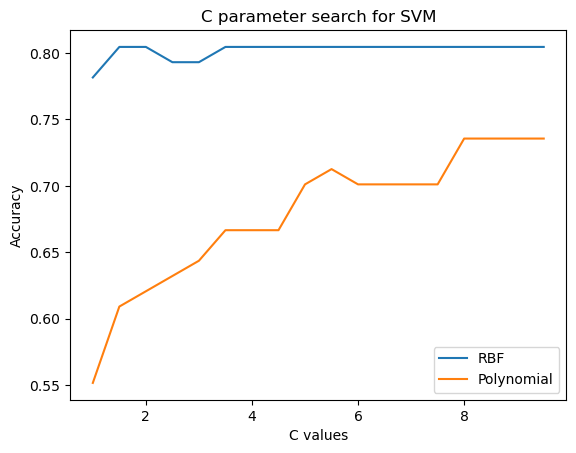

In [11]:
plt.plot(Cvalues, listofaccuracyrbf)
plt.plot(Cvalues, listofaccuracypoly)
plt.xlabel("C values")
plt.ylabel("Accuracy")
plt.title("C parameter search for SVM")
plt.legend(['RBF', "Polynomial"])

#plt.savefig('C_parameter_search_for_SVM.png')
plt.show()

In [ ]:
#looking for best hyperparameters RBF SVM, C and gamma
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}

# Create an SVM classifier with polynomial kernel
svm_classifier = SVC(kernel='rbf')

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_oversampled, y_train_oversampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_svm_model = SVC(kernel='rbf', **best_params)
best_svm_model.fit(X_train_oversampled, y_train_oversampled)

# Evaluate the model on the test set bc just
accuracy = best_svm_model.score(X_test, y_test)

In [ ]:
print(accuracy)
print(best_params)

In [13]:
#Prediction using C 1 and gamma 1 for rbf kernel
#TEST IS GOOD HERE
grid_prediction = grid_search.predict(X_test)
print("Classification report for RBF kernel after grid search")
print(metrics.classification_report(y_test, grid_prediction))

              precision    recall  f1-score   support

       MSI-H       0.00      0.00      0.00        14
       MSI-L       0.00      0.00      0.00        11
         MSS       0.71      1.00      0.83        62

    accuracy                           0.71        87
   macro avg       0.24      0.33      0.28        87
weighted avg       0.51      0.71      0.59        87



C:\Users\blank\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\blank\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\blank\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
#looking for best hyperparameters Polynomial kernel SVM, C and gamma, degree
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 0.3, 0.5, 1, 10],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'degree': [1]
}

# Create an SVM classifier with polynomial kernel
svm_classifier = SVC(kernel='poly')

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_oversampled, y_train_oversampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_svm_model = SVC(kernel='poly', **best_params)
best_svm_model.fit(X_train_oversampled, y_train_oversampled)

# Evaluate the model
accuracy = best_svm_model.score(X_test, y_test)

In [25]:
print(accuracy)
print(best_params)

0.735632183908046
{'C': 0.1, 'degree': 1, 'gamma': 1}


In [30]:
#Prediction using {'C': 0.1, 'degree': 1, 'gamma': 1} for polynomial kernel with 0.735632183908046 accuracy
grid_prediction = grid_search.predict(X_test)
print("Classification report for Polynomial kernel after grid search")
print(metrics.classification_report(y_test, grid_prediction))
print(best_svm_model)

Classification report for Polynomial kernel after grid search
              precision    recall  f1-score   support

       MSI-H       0.92      0.86      0.89        14
       MSI-L       0.08      0.09      0.09        11
         MSS       0.82      0.82      0.82        62

    accuracy                           0.74        87
   macro avg       0.61      0.59      0.60        87
weighted avg       0.75      0.74      0.74        87

SVC(C=0.1, degree=1, gamma=1, kernel='poly')


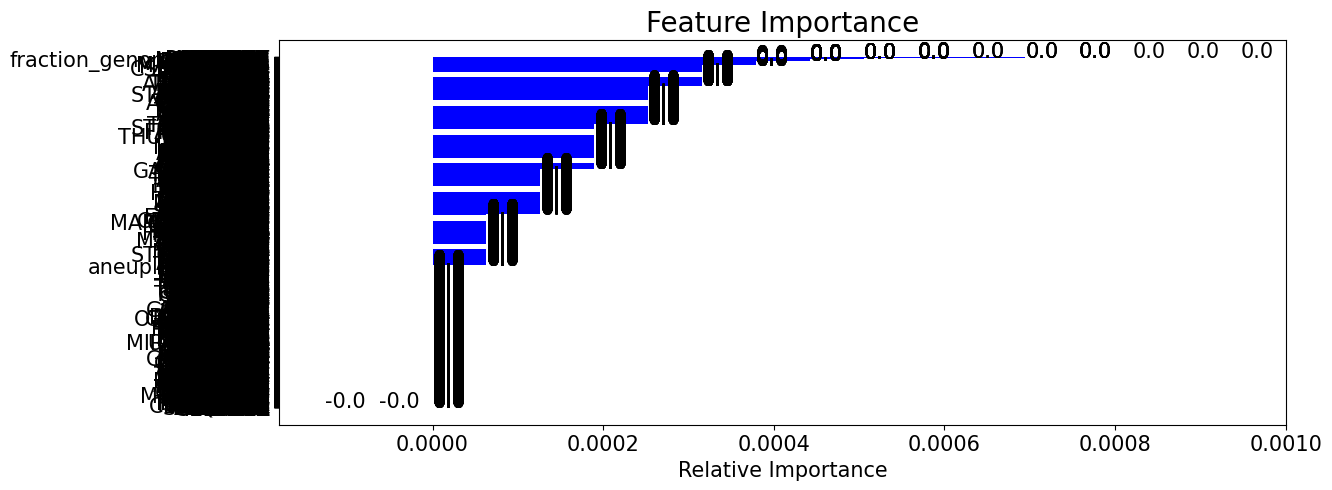

In [31]:
#Feature importance for polynomial kernel with permutation importance
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(best_svm_model, X_val, y_val)
# Making the sum of feature importance being equal to 1.0,
# so feature importance can be understood as percentage
perm_importance_normalized = perm_importance.importances_mean/perm_importance.importances_mean.sum()
# Feature's name (considering your X a DataFrame)
feature_names = X.columns
features = np.array(feature_names)
# Sort to plot in order of importance
sorted_idx = perm_importance_normalized.argsort()

# Plotting
plt.figure(figsize=(13,5))
plt.title('Feature Importance',fontsize=20)
plt.barh(features[sorted_idx], perm_importance_normalized[sorted_idx], color='b', align='center')
plt.xlabel('Relative Importance', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

for index, value in enumerate(perm_importance_normalized[sorted_idx]):
    plt.text(value, index,
             str(round(value,2)), fontsize=15)

plt.show()


In [ ]:
#prediction 
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
#prediction for oversampled data
over_poly_pred = over_poly.predict(X_test)
over_rbf_pred = over_rbf.predict(X_test)

In [83]:
#the accuracy and f1 scores for SVM with Polynomial kernel
#For the f1 score, it calculates the harmonic mean between
#precision and recall, and both depend on the false positive and false negative.
#So, it’s useful to calculate the f1 score when the data set isn’t balanced.
#For the accuracy score, it shows the percentage of the true positive and true negative to all data points.
#So, it’s useful when the data set is balanced.
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (Polynomial Kernel):  82.76
F1 (Polynomial Kernel):  76.98
Accuracy (RBF Kernel):  71.26
F1 (RBF Kernel):  59.31


In [84]:
#Accuracy and F1 for oversampled data
poly_accuracy = accuracy_score(y_test, over_poly_pred)
poly_f1 = f1_score(y_test, over_poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))
rbf_accuracy = accuracy_score(y_test, over_rbf_pred)
rbf_f1 = f1_score(y_test, over_rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (Polynomial Kernel):  57.47
F1 (Polynomial Kernel):  62.85
Accuracy (RBF Kernel):  71.26
F1 (RBF Kernel):  59.31


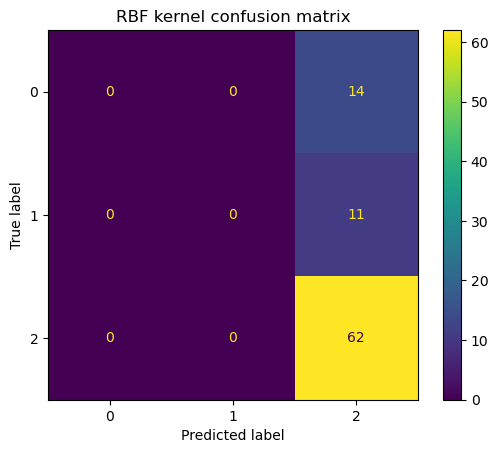

In [89]:
#Confusion mx for rbf kernel oversampled
conf_mx = metrics.confusion_matrix(y_test, over_rbf_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mx)
cm_display.plot()
plt.title("RBF kernel confusion matrix")

#plt.savefig('RBF kernel confusion matrix.png')
plt.show()

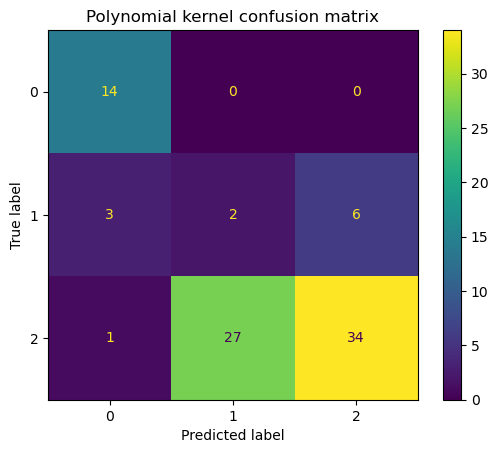

In [88]:
#confusion mx for polynomial oversampled 
conf_mx = metrics.confusion_matrix(y_test, over_poly_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mx)
cm_display.plot()

plt.title("Polynomial kernel confusion matrix")
#plt.savefig('Polynomial kernel confusion matrix.png')
plt.show()

In [125]:
#metrics for polynomial kernel svm
Accuracy = metrics.accuracy_score(y_test, poly_pred)
Validation = metrics.accuracy_score(y_val, poly_pred)
Precision = metrics.precision_score(y_test, poly_pred, average = 'weighted')
Sensitivity_recall = metrics.recall_score(y_test, poly_pred, average = 'weighted')
Specificity = metrics.recall_score(y_test, poly_pred, average = 'weighted', pos_label=0)
F1_score = metrics.f1_score(y_test, poly_pred, average = 'weighted')
#AUC = metrics.roc_auc_score(y_test, poly_pred, average = 'weighted')
#print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score, "AUC":AUC})

C:\Users\blank\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\blank\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [126]:
print({'Accuracy':Accuracy, 'Validation':Validation})

{'Accuracy': 0.8390804597701149, 'Validation': 0.6206896551724138}
